# Lab 4

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 演算法的實作可以參考[lab-4](https://yuanyuyuan.github.io/itcm/lab-4.html), 有任何問題歡迎找助教詢問。
4. **Deadline: 11/20(Wed.)**

In [1]:
name = "鄭如芳"
student_id = "B05602020"

---

# Exercise 1.  Finite Difference
---

### Part 0.

#### Import necessary libraries. Note that diags library from scipy is used to construct the differentiation matrix below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

---

### Part 1. 

#### Given a function $u(x)$ which we want to find its derivative with numerical methods.

#### Consider a uniform grid partitioning $x$ into $\{x_1, x_2, \dots, x_n\}$ with grid size $\Delta x=x_{j+1}-x_j, j\in \{1, 2, \dots, n\}$, and a set of corresponding data values $U=\{U_1, U_2, \dots, U_n\}$, where 
#### $$U_{j+k} = u(x_j + k \Delta x) = u(x_{j+k}), j\in \{1, 2, \dots, n\}.$$

#### We want to use one-sided finite-difference formula 

#### $$\alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}$$

#### to approximate the derivative of $u$ at all the points $x_j, j\in \{1, 2, \dots, n\}$, that is

#### $$u'(x_j) \approx W_j \triangleq \alpha_1 U_j + \alpha_2 U_{j+1} + \alpha_3 U_{j+2}.$$

---

#### Part 1.1

Find the coefficients $\alpha_j$ for $j=1,2,3$ which make the stencil above accurate for as high degree polynomials as possible.

Write down your derivation in detail with Markdown/LaTeX.

$$By\,Taylor\,expansion\\
U_j=u(x_j)\\
U_j+1=u(x_j+\Delta x)\approx u(x_j)+\Delta x u'(x_j)+\frac{(\Delta x)^2}{2}u''(x)\\
U_j+2=u(x_j+2\Delta x)\approx u(x_j)+2\Delta x u'(x_j)+\frac{4\Delta x^2)}{2}u''(x_j)\\
Thus\,\alpha_1=\frac{-3}{2\Delta x}\\
\alpha_2=\frac{4}{2\Delta x}\\
\alpha_3=\frac{-1}{2\Delta x}$$

#### Part 1.2

Fill in the tuple variable `alpha` of lenght 3 with your answer above. 

In [3]:
# Hint: alpha = [value of alpha_1, value of alpha_2, value of alpha_3]
# ===== 請實做程式 =====
alpha=[-3/2,2,-1/2]
# ====================

In [4]:
print('My alpha =', alpha)

My alpha = [-1.5, 2, -0.5]


---

### Part 2.

#### Suppose we use the finite-difference formula above to approximate and assume the problem is periodic, i.e. take $U_0=U_n$, $U_1=U_{n+1}$, and so on. 

#### Find the differentiation matrix $D$ so that the numerical differentiation problem can be represented as a matrix-vector multiplication $W \triangleq DU$, where $D \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n}$, and $W \in \mathbb{R}^n$.

---

#### Part 2.1

Complete the following function to construct the desired differentiation matrix under the __periodic boundary condition__ with given number of partition $n$, coefficients of 3-point finite-difference formula $\alpha$, and mesh size $\Delta x$.

In [66]:
def construct_differentiation_matrix(n, alpha, delta_x):
    ''' Construct
    Parameters
    ----------
    n : int
        number of partition
    alpha : tuple of length 3
       alpha = (𝛼1, 𝛼2, 𝛼3)
    delta_x : float
        mesh size
        
    Returns
    -------
    D : scipy.sparse.diags
    '''
    # ===== 請實做程式 =====
    diagonals = 
        [alpha[0] * np.ones(n),
         alpha[1] * np.ones(n-1),
         alpha[2] * np.ones(n-2),
         alpha[1] * np.ones(1),
         alpha[2] * np.ones(2)]
    D=diags(diagonals, offsets=[0, 1, 2,-n+1,-n+2])
    D/=delta_x 
    '''
    I originally want to use method below
    D1=alpha[0]*np.eye(n)
    D2=alpha[1]*np.eye(n,k=1)
    D3=alpha[2]*np.eye(n,k=2)
    D4=alpha[2]*np.eye(n,k=-(n-2))
    D5=alpha[1]*np.eye(n,k=-(n-1))
    D=D1+D2+D3+D4+D5
    D=D/delta_x
    but I don't know why if I do so,
    then Part2.2 get error with 
    'numpy.ndarray' object has no attribute 'toarray' lol
    '''
    # ====================
    return D

#### Part 2.2

Print and check your implementation.

In [67]:
print("For n = 8 and mesh size 1, D in dense form is")
sparse_D = construct_differentiation_matrix(8, alpha, 1)
dense_D = sparse_D.toarray()
print(dense_D)

For n = 8 and mesh size 1, D in dense form is
[[-1.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -1.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -1.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -1.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -1.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -1.5  2.  -0.5]
 [-0.5  0.   0.   0.   0.   0.  -1.5  2. ]
 [ 2.  -0.5  0.   0.   0.   0.   0.  -1.5]]


---

### Part 3.


#### Take $u(x)=e^{\sin x}$ on the domain $[-\pi, \pi]$.  Find the finite difference approximation $W$ for $\{u'(x_j)\}^{n}_{j=1}$ for various values of $n=2^{k}$, $k=3,4,\dots,10$, and analyze the errors.

---

#### Part 3.1

Define the functinos $u$ and $u'(x)$.

In [55]:
def u(x):
    # ===== 請實做程式 =====
    return np.exp(np.sin(x))
    # ====================

def d_u(x):
    # ===== 請實做程式 =====
    return np.cos(x)*np.exp(np.sin(x))
    # ====================

Plot and check the functions

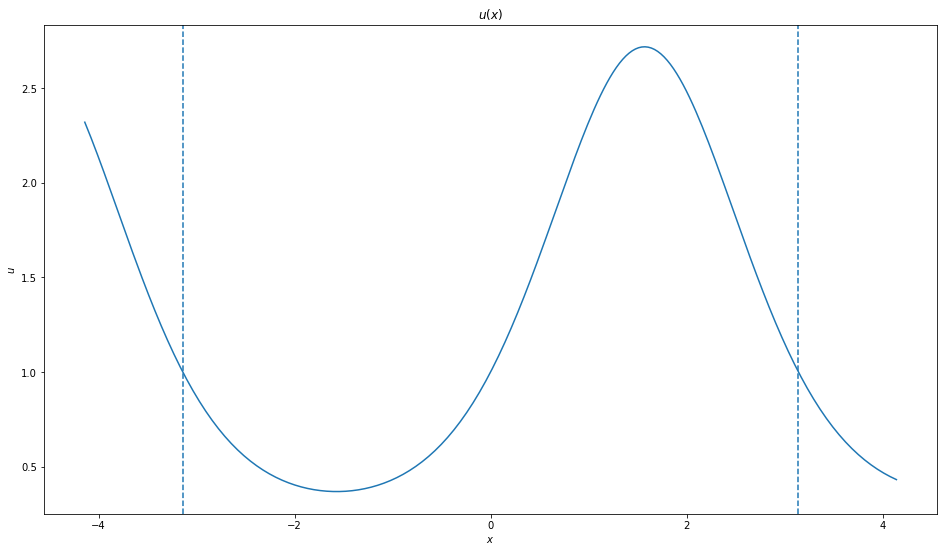

In [56]:
x_range = np.linspace(-np.pi-1, np.pi+1, 2**8)
plt.figure(figsize=(16, 9))
plt.plot(x_range, u(x_range))
plt.axvline(x=np.pi, linestyle='--')
plt.axvline(x=-np.pi, linestyle='--')
plt.ylabel(r'$u$')
plt.xlabel(r'$x$')
plt.title(r'$u(x)$')
plt.show()

#### Part 3.2

Plot the $u'$ and $W$ together for each point $x_j, j \in \{1, 2, \dots, n\}$ with $n=2^k, k\in \{3, 4, \dots, 10\}$. Note that there're total 8 figures to be plotted. And you need to compute the error, display them in the plots, and store them into the list variable `error_list` for further analysis below.

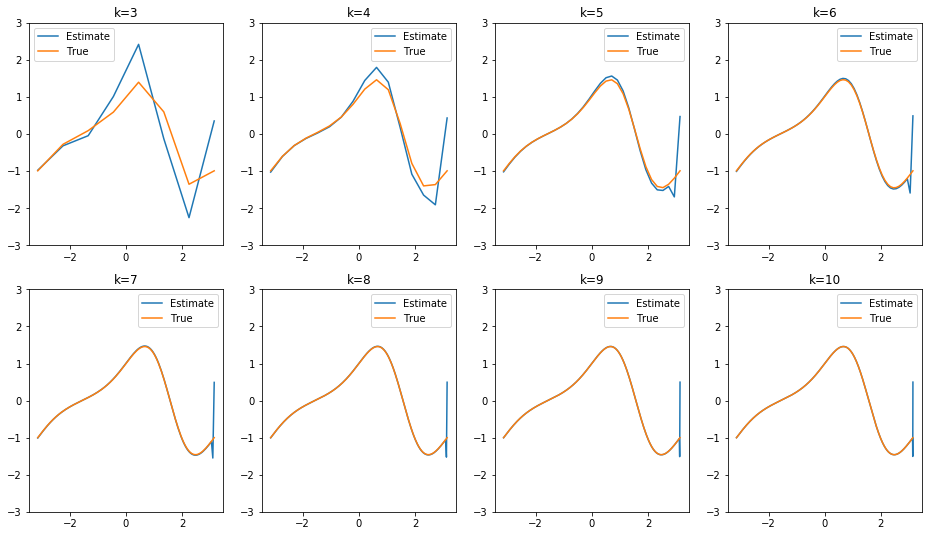

In [113]:
error_list = []
fig, axes = plt.subplots(2, 4, figsize=(16,9))
for idx, ax in enumerate(axes.flatten()):
    
    '''Hints: 
    For each case in this for loop, you may follow the steps below
        1. Use idx to set k and n.
        2. Prepare n partition points of the domain.
        3. Construct D.
        4. Find u', U, and W. 
        5. Compute the error between u' and W.
        6. Append the error into error_list.
        7. Use ax to plot u', W with proper labels, title
        8. Enable legend to show the labels of curves.
        9. To make the plots more readable, set a consistent range of y-axis e.g. ax.set_ylim([-3, 3])
    '''
    # ===== 請實做程式 =====
    k=idx+3 
    n=2**k #there are k points
    mesh_size=(2*np.pi)/n
    partition=np.linspace(-np.pi,np.pi,n)
    f_partition=[u(partition)]
    f_partition=np.transpose(f_partition)
    
    D = construct_differentiation_matrix(n,alpha,mesh_size)  
    D = D.toarray()  
    
    T = d_u(partition)         #Ture  
    W = np.dot(D,f_partition)  #estimated
                   
    ax.plot(partition, W,label='Estimate')
    ax.plot(partition, T,label='True')
    ax.set_title("k="+str(k))
    ax.set_ylim([-3, 3])
    ax.legend()
    # ====================

Plot the `error_list` with respect to $k=3, 4, \dots, 10$ in log scale to show the error behavior.

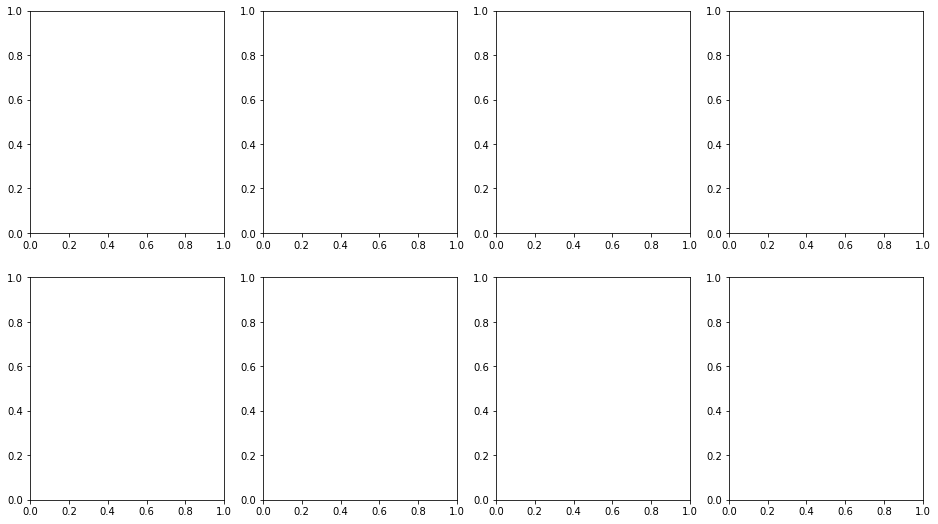

In [114]:
    fig, axes = plt.subplots(2, 4, figsize=(16,9))
    '''
    I tried  
    T = [T[i] for i in range(0,len(T))]
    W = [W[i][0] for i in range(0,len(T))]
    partiton = [partition[i] for i in range(0,len(T))]
    error = [np.abs(T[i]-W[i]) for i in range(len(T))]
    error_list.append(error)
    but failed to plot this QQ
    '''

#### Part 3.3

From the figure above, what rates of convergence do you observe as $\Delta x \to 0$?

> Please write down your answer here.